# **Prolog**

>Seorang pengusaha, bernama B bercerita bahwa ia memiliki bisnis berupa toko DVD Rental yang kemudian diberi nama Sakila. Saat ini, jumlah toko yang dimilikinya adalah sebanyak 2 store (Canada & Australia). Bisnis ini dia mulai sejak tahun 2005, dan saat ini ia ingin melakukan evaluasi performance terhadap kedua store-nya. Ia ingin melihat apakah bisnis rental DVD yang sudah berjalan saat ini sudah memiliki performance yang baik atau ia harus menyusun strategi bisnis baru.
>
>Ia meminta bantuan untuk melakukan analysis terkait bisnisnya menggunakan sumber data dari link berikut :
https://downloads.mysql.com/docs/sakila-db.tar.gz
>
>Setelah dicek, database (Sakila.sql) yang diberikan oleh B terdiri atas 16 tabel. Berikut ini merupakan penjelasan singkat untuk masing-masing table:

| No. | Tabel | Description |
| --- | --- | --- |
|1 | Actor|list nama-nama actor|
|2 | Address |list alamat store, staff & customer|
|3 | Category |list kategori film|
|4 | City |list nama-nama kota|
|5 | Country |list nama-nama negara|
|6 | Customer |list customer dvd rental|
|7 | Film |list film yang tersedia/dapat dirental|
|8 | Film_actor |list id film & id actor (connector table) |
|9 | Film_category |list id film & id kategori (connector table) |
|10 |Film_text |summary film|
|11| Inventory  |informasi inventory dvd rental pada masing2 store|
|12| Language  |list bahasa |
|13| Payment|list pembayaran yang dilakukan oleh setiap customer|
|14|Rental |list peminjaman dvd|
|15|Staff|daftar staff dvd rental sakila|
|16|Store |daftar store dvd rental sakila|

## **Connect to the Database (Sakila)**

>Analisis dilakukan menggunakan Python. Untuk dapat mengakses database MySQL di Python, harus terlebih dahulu dilakukan import library MySQL Connector Python & library Pandas. Setelah itu, barulah dilakukan koneksi ke database Sakila

In [153]:
# Import Library
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to database sakila
mydb = mysql.connector.connect (host ='localhost', user ='root', passwd ='@20Agustus1996SQL',database='sakila')

>Untuk memudahkan proses analisis, semua data yang ada pada 16 tabel tersebut diringkas dan digabungkan kedalam 1 tabel summary. Penggabungan data antar tabel dilakukan menggunakan fungsi query left join. Tabel Summary (summary_table) tersusun atas gabungan beberapa kolom dari beberapa tabel dengan penjelasan sebagai berikut :

| No. | Column | From Tabel | Description |
| --- | --- | --- | --- |
|1 | rental_id |rental| no. id rental yang dilakukan oleh customer|
|2 | inventory_id |rental| no. id inventory dari dvd yang dirental oleh customer|
|3 | film_id |inventory| no. id film yang dirental customer|
|4 | film_title |film| judul film yang dirental customer|
|5 | film_category |category| kategori dari film yang dirental customer|
|6 | film_length |film| durasi dari film yang dirental customer|
|7 | film_rating |film| rating dari film yang dirental customer|
|8 | customer_id |rental |no.id customer yang melakukan rental|
|9 | staff_id |rental |no.id staff yang melayani rental|
|10 |staff_fname |staff|first name dari staff|
|11| inv_loc_id |inventory|no. id store inventory yang dirental|
|12| inv_country |country|negara adri store inventory yang dirental|
|13| pay_id|payment|no. id pembayaran yang dilakukan oleh customer|
|14|pay_amount |payment |jumlah yang dibayarkan oleh customer|
|15| pay_date|payment|tanggal pembayaran yang dilakukan oleh customer|
|16|rent_date |rental|tanggal peminjaman|
|17| return_date |rental|tanggal pengembalian|
|18| rent_periode ||lama periode peminjaman|
|19| max_rent_duration |film|maksimal periode peminjaman yang diperbolehkan per rate|
|20| rent_rate |film|rate pinjam per periode yang ditentukan|

-> Rent_periode merupakan hasil perhitungan jarak tanggal return_date dengan rent_date menggunakan function datediff.

In [154]:
mycursor = mydb.cursor()

#Function Query
def sql (query):
	mycursor.execute(query)
	result=mycursor.fetchall()
	# Show Query in DataFrame
	df=pd.DataFrame(result,columns = mycursor.column_names)
	return df

# Query Main Table for analysis
summary_table = sql('''
select  r.rental_id, 
		r.inventory_id, 
		i.film_id, 
		f.title as film_title, 
		ca.name as film_category, 
		f.length as film_length, 
		f.rental_duration as max_rent_duration,
		f.rental_rate as rent_rate,
		f.rating as film_rating, 
		r.customer_id, 
		r.staff_id,
		s.first_name as staff_fname, 
		i.store_id as inv_loc_id,
		co.country as inv_country, 
		p.payment_id as pay_id, 
		p.amount as pay_amount,
		date(p.payment_date) as pay_date, 
		date(r.rental_date) as rent_date, 
		date(r.return_date) as return_date,
		datediff(r.return_date, r.rental_date) as rent_periode
from rental r
left join inventory i on r.inventory_id = i.inventory_id
left join staff s on r.staff_id = s.staff_id
left join store st on i.store_id = st.store_id
left join address a on st.address_id = a.address_id
left join city c on a.city_id =c.city_id
left join country co on c.country_id = co.country_id
left join film f on f.film_id = i.film_id
left join payment p on r.rental_id = p.rental_id
left join film_category fc on fc.film_id = f.film_id
left join category ca on ca.category_id = fc.category_id
''')
# Show 5 first row in table
summary_table.head()

,rental_id,inventory_id,film_id,film_title,film_category,film_length,max_rent_duration,rent_rate,film_rating,customer_id,staff_id,staff_fname,inv_loc_id,inv_country,pay_id,pay_amount,pay_date,rent_date,return_date,rent_periode
0,1,367,80,BLANKET BEVERLY,Family,148,7,2.99,G,130,1,Mike,1,Canada,3504,2.99,2005-05-24,2005-05-24,2005-05-26,2.0
1,2,1525,333,FREAKY POCUS,Music,126,7,2.99,R,459,1,Mike,2,Australia,12377,2.99,2005-05-24,2005-05-24,2005-05-28,4.0
2,3,1711,373,GRADUATE LORD,Children,156,7,2.99,G,408,1,Mike,2,Australia,11032,3.99,2005-05-24,2005-05-24,2005-06-01,8.0
3,4,2452,535,LOVE SUICIDES,Horror,181,6,0.99,R,333,2,Jon,1,Canada,8987,4.99,2005-05-24,2005-05-24,2005-06-03,10.0
4,5,2079,450,IDOLS SNATCHERS,Children,84,5,2.99,NC-17,222,1,Mike,2,Australia,6003,6.99,2005-05-24,2005-05-24,2005-06-02,9.0


## **Data Cleaning & Manipulation**

#### **a. Checking the Database Summary Table (summary_table)**

>Setelah membuat tabel summary yang nantinya digunakan untuk analisis selanjutnya (summary_table), ada baiknya data pada tabel tersebut dicek terlebih dahulu apakah layak untuk dilanjutkan ke tahap analisis atau butuh dimanipulasi. Mengapa demikian ? Karena kita tidak ingin proses analisis me-lead ke pengambilan keputusan yang kurang tepat hanya karena data yang digunakan kualitasnya kurang (contoh : banyak null/data kosong, jenis tipe data tidak sesuai, duplikasi data, etc.).

##### 1. Dilakukan pengecekan apakah terdapat data yang null dan apakah tipe datanya sudah sesuai semua

In [155]:
# Cek Info summary_table untuk cek apakah ada data yang null & jenis tipe datanya tidak sesuai
summary_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rental_id          16044 non-null  int64  
 1   inventory_id       16044 non-null  int64  
 2   film_id            16044 non-null  int64  
 3   film_title         16044 non-null  object 
 4   film_category      16044 non-null  object 
 5   film_length        16044 non-null  int64  
 6   max_rent_duration  16044 non-null  int64  
 7   rent_rate          16044 non-null  object 
 8   film_rating        16044 non-null  object 
 9   customer_id        16044 non-null  int64  
 10  staff_id           16044 non-null  int64  
 11  staff_fname        16044 non-null  object 
 12  inv_loc_id         16044 non-null  int64  
 13  inv_country        16044 non-null  object 
 14  pay_id             16044 non-null  int64  
 15  pay_amount         16044 non-null  object 
 16  pay_date           160

##### 2. Dilakukan pengecekan lebih lanjut terkait jumlah data null yang ada & list row yang memiliki data null

In [156]:
# Cek jumlah data null pada setiap kolom
summary_table.isnull().sum()

rental_id              0
inventory_id           0
film_id                0
film_title             0
film_category          0
film_length            0
max_rent_duration      0
rent_rate              0
film_rating            0
customer_id            0
staff_id               0
staff_fname            0
inv_loc_id             0
inv_country            0
pay_id                 0
pay_amount             0
pay_date               0
rent_date              0
return_date          183
rent_periode         183
dtype: int64

In [157]:
# Cek row mana yang memiliki data null
summary_table.loc[summary_table.isnull().any(axis=1)]

,rental_id,inventory_id,film_id,film_title,film_category,film_length,max_rent_duration,rent_rate,film_rating,customer_id,staff_id,staff_fname,inv_loc_id,inv_country,pay_id,pay_amount,pay_date,rent_date,return_date,rent_periode
11491,11496,2047,445,HYDE DOCTOR,Classics,100,5,2.99,G,155,1,Mike,1,Canada,4234,7.98,2006-02-14,2006-02-14,None,NaN
11536,11541,2026,440,HUNGER ROOF,Foreign,105,6,0.99,G,335,1,Mike,2,Australia,9066,0.99,2006-02-14,2006-02-14,None,NaN
11558,11563,1545,338,FRISCO FORREST,Sci-Fi,51,6,4.99,PG,83,1,Mike,2,Australia,2268,4.99,2006-02-14,2006-02-14,None,NaN
11572,11577,4106,893,TITANS JERK,Sci-Fi,91,4,4.99,PG,219,2,Jon,2,Australia,5947,4.99,2006-02-14,2006-02-14,None,NaN
11588,11593,817,178,CONNECTION MICROCOSMOS,Comedy,115,6,0.99,G,99,1,Mike,1,Canada,2687,0.99,2006-02-14,2006-02-14,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,15862,925,205,DANCES NONE,Action,58,3,0.99,NC-17,215,1,Mike,1,Canada,5857,0.99,2006-02-14,2006-02-14,None,NaN
15861,15867,837,183,CONVERSATION DOWNHILL,Family,112,4,4.99,R,505,2,Jon,2,Australia,13625,4.99,2006-02-14,2006-02-14,None,NaN
15869,15875,3611,789,SHOCK CABIN,Foreign,79,7,2.99,PG-13,41,1,Mike,1,Canada,1148,2.99,2006-02-14,2006-02-14,None,NaN
15888,15894,4416,966,WEDDING APOLLO,Documentary,70,3,0.99,PG,168,1,Mike,1,Canada,4581,0.99,2006-02-14,2006-02-14,None,NaN


##### 3. Dilakukan pengecekan apakah terdapat data duplikat
>Kolom rental_id pada database summary_table merupakan unique key, dimana datanya tidak boleh ada yang duplikat. Rental_id menunjukkan setiap transaksi yang terjadi, dan seharusnya satu transaksi dengan transaksi lain tidak ada yang sama no. id nya

In [158]:
# Cek ada/tidak data yang duplikat >> false = tidak ada yang duplikat
summary_table['rental_id'].duplicated().any()

False

Berikut adalah kesimpulan dari proses cek info summary_table :

>**1. Terdapat data Null/Kosong**
>
>Dapat kita lihat bahwa column pada summary_table seharusnya terdiri atas 16044 row non-null. Namun, jika kita lihat pada kolom return_date & rent_periode, row data hanya terhitung 15861 row non-null. Dapat dikatakan bahwa pada kolom return_date & rent_periode (sebagai turunan return_date) terdapat data null. Menggunakan function isnnull().sum(), dapat kita ketahui bahwa jumlah data null pada return_date & rent_periode masing-masing ada sebanyak 183 (1% dari data seharusnya). Namun, setelah ditelusuri lebih lanjut data null tersebut memang bukan dari kesalahan miss input. Sampai saat database dibuat, customer belum melakukan pengembalian dvd, dan hal tersebut wajar. Maka, dapat disimpulkan data null pada return_date & rent_periode **tidak akan dihilangkan** dengan pertimbangan kewajaran data dan tidak memberikan pengaruh yang sangat signifikan pada analisis

>**2. Terdapat data yang memiliki tipe data yang tidak sesuai**
>
>Berdasarkan cek info, dapat kita lihat bahwa terdapat beberapa kolom yang memiliki tipe data yang tidak sesuai. Seperti :
>1.  pay_amount >> seharusnya tipe numerical
>2.  pay_date >> seharusnya tipe date
>3.  rent_date >> seharusnya tipe date
>4.  return_date >> seharusnya tipe date
>5.  rent_rate >> seharusnya tipe numerical

>**3. Tidak terdapat data yang duplikat pada kolom rental_id**

#### **b. Clean the Database Summary Table (summary_table)**

##### 1. Correct the data type

>Agar proses analisis dapat berjalan dengan lancar, terdapat beberapa data yang tipe datanya harus diubah sebagaimana dipaparkan sebelumnya

In [159]:
# Correct the data type
summary_table['pay_amount'] = pd.to_numeric(summary_table['pay_amount'])
summary_table['pay_date'] = pd.to_datetime(summary_table['pay_date'])
summary_table['rent_date'] = pd.to_datetime(summary_table['rent_date'])
summary_table['return_date'] = pd.to_datetime(summary_table['return_date'])
summary_table['rent_rate'] = pd.to_numeric(summary_table['rent_rate'])

In [160]:
# Re-Check Data Type

summary_table.info()

# As per output below, semua tipe data sudah sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rental_id          16044 non-null  int64         
 1   inventory_id       16044 non-null  int64         
 2   film_id            16044 non-null  int64         
 3   film_title         16044 non-null  object        
 4   film_category      16044 non-null  object        
 5   film_length        16044 non-null  int64         
 6   max_rent_duration  16044 non-null  int64         
 7   rent_rate          16044 non-null  float64       
 8   film_rating        16044 non-null  object        
 9   customer_id        16044 non-null  int64         
 10  staff_id           16044 non-null  int64         
 11  staff_fname        16044 non-null  object        
 12  inv_loc_id         16044 non-null  int64         
 13  inv_country        16044 non-null  object        
 14  pay_id

##### 2. Check the Outliers

>Setelah dilakukan perubahan jenis tipe data pada pay_amount, dicek lebih lanjut apakah pay_amount terdiri atas data dengan nilai extreme yang dapat mempengaruhi hasil analisis
>
>Pengecekan dilakukan menggunakan Box Plot & IQR Score untuk mengetahui list dari outlier yang teridentifikasi

C:\Users\Monika P\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


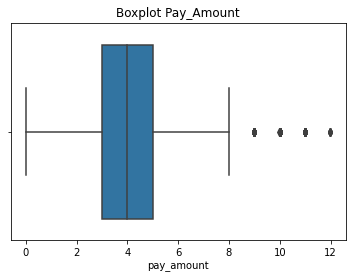

In [161]:
# Check Outlier by Boxplot Viz
sns.boxplot(summary_table['pay_amount'])
plt.title('Boxplot Pay_Amount')
plt.show()

In [162]:
# Cek list outlier menggunakan IQR
q1=summary_table['pay_amount'].describe()['25%'] #Cek Quartile 1
q3=summary_table['pay_amount'].describe()['75%']#Cek Quartile 3
iqr=q3-q1 #Angka IQR
print('Q1 : ',q1)
print('Q3 : ',q3)
print('IQR : ',iqr)

Q1 :  2.99
Q3 :  4.99
IQR :  2.0


In [163]:
lowerlim=round(q1-1.5*iqr,2) #Batas bawah
upperlim=round(q3+1.5*iqr,2) #Batas atas
print('Lower Limit : ',lowerlim)
print('Upper Limit : ',upperlim)

Lower Limit :  -0.01
Upper Limit :  7.99


In [164]:
# Outliers under lower limit
summary_table['pay_amount'][(summary_table['pay_amount']<lowerlim)]

# As per result below, tidak ada outlier yang nilainya lebih kecil dari limit bawah

Series([], Name: pay_amount, dtype: float64)

In [165]:
# Outliers excess upper limit
summary_table[['rental_id','pay_amount']][summary_table['pay_amount']>upperlim]

# As per result below, terdapat outlier yang nilainya lebih besar dari limit atas sebanyak 855 data

,rental_id,pay_amount
10,11,8.99
14,15,9.99
74,75,8.99
105,106,11.99
109,110,9.99
...,...,...
16014,16020,8.99
16024,16030,9.99
16034,16040,11.99
16037,16043,9.99


In [166]:
# Count Distinct Outlier Upper
summary_table['pay_amount'][summary_table['pay_amount']>upperlim].value_counts()

# As per result below, terdapat 4 varian value outliers 

8.99     485
9.99     256
10.99    104
11.99     10
9.98       1
8.97       1
Name: pay_amount, dtype: int64

In [167]:
# Query table outlier
table_2 = sql('''
select  r.rental_id, 
		f.rental_duration as max_rent_duration,
		f.rental_rate as rent_rate,
		datediff(r.return_date, r.rental_date) as rent_periode,
		p.amount as pay_amount
from rental r
left join inventory i on r.inventory_id = i.inventory_id
left join staff s on r.staff_id = s.staff_id
left join store st on i.store_id = st.store_id
left join address a on st.address_id = a.address_id
left join city c on a.city_id =c.city_id
left join country co on c.country_id = co.country_id
left join film f on f.film_id = i.film_id
left join payment p on r.rental_id = p.rental_id
left join film_category fc on fc.film_id = f.film_id
left join category ca on ca.category_id = fc.category_id
having 
rent_periode>max_rent_duration
and pay_amount>7.99
''')
# Show 5 first row in table
table_2.head()

,rental_id,max_rent_duration,rent_rate,rent_periode,pay_amount
0,11,4,4.99,8,8.99
1,15,4,4.99,9,9.99
2,75,5,4.99,9,8.99
3,106,3,4.99,10,11.99
4,110,4,4.99,9,9.99


Berikut merupakan kesimpulan dari cek outlier pada pay_amount :

>1. Boxplot menunjukkan terdapat data outlier dengan value antara 8-12 sebanyak 4 poin
>
>2. Kemudian, dianalisis lebih lanjut berapa banyak data outliers beserta valuenya. Menggunakan metode IQR dapat terlihat bahwa terdapat sekitar 855 data (appx. 5.34% dari total data) yang merupakan outliers dengan varian value : 8.99 , 9.99, 10.99, 11.99
>
>3. Nilai outlier tersebut kemudian dilakukan analisis lebih lanjut dengan melihat data-data tersebut pada sql tabel. Didapatkan bahwa angka pay_amount yang menjadi outlier adalah angka murni dan bukan kesalahan input data. Mengapa ? Disini kita dapat melihat bahwa customer melakukan pengembalian dvd diatas rental duration yang diperbolehkan, maka dari itu customer harus membayar lebih sesuai dengan hari lebih yang terhitung. Contohnya pada rental_id 11 , dapat kita lihat seharusnya customer paling lambat mengembalikan dvd setelah 4 hari peminjaman, namun ia baru mengembalikan dvd di hari ke 8 (telat 4 hari). Maka, pay_amount yang dia bayarkan adalah sebesar : $4.99 + 4 hari *$1 = $8.99

Berdasarkan hasil cek outlier, disimpulkan bahwa data yang menjadi outliers tidak akan dihilangkan. Hal ini dikarenakan data outliers tersebut bukan kesalahan input namun bagian dari perhitungan payment secara natural jika terjadi pengembalian diluar tenggat waktu yang diperbolehkan.

Berikut ini adalah sample tampilan tabel summary_table yang telah melalui proses check & cleaning dan siap digunakan untuk proses analisis selanjutnya.

In [168]:
summary_table.sample(20)

,rental_id,inventory_id,film_id,film_title,film_category,film_length,max_rent_duration,rent_rate,film_rating,customer_id,staff_id,staff_fname,inv_loc_id,inv_country,pay_id,pay_amount,pay_date,rent_date,return_date,rent_periode
3041,3044,3216,706,QUEEN LUKE,Drama,163,5,4.99,PG,424,1,Mike,2,Australia,11451,4.99,2005-06-20,2005-06-20,2005-06-25,5.0
14787,14792,4436,970,WESTWARD SEABISCUIT,Classics,52,7,0.99,NC-17,396,1,Mike,1,Canada,10738,1.99,2005-08-22,2005-08-22,2005-08-30,8.0
3691,3694,3848,843,STEEL SANTA,Classics,143,4,4.99,NC-17,419,2,Jon,1,Canada,11328,4.99,2005-07-06,2005-07-06,2005-07-08,2.0
10304,10309,1505,329,FORREST SONS,Action,63,4,2.99,R,156,2,Jon,2,Australia,4251,6.99,2005-08-01,2005-08-01,2005-08-09,8.0
7936,7940,901,200,CURTAIN VIDEOTAPE,Games,133,7,0.99,PG-13,409,2,Jon,2,Australia,11075,0.99,2005-07-28,2005-07-28,2005-07-29,1.0
12842,12847,384,85,BONNIE HOLOCAUST,Documentary,63,4,0.99,G,91,2,Jon,2,Australia,2494,0.99,2005-08-19,2005-08-19,2005-08-23,4.0
3792,3795,240,54,BANGER PINOCCHIO,Music,113,5,0.99,R,153,2,Jon,2,Australia,4161,0.99,2005-07-06,2005-07-06,2005-07-11,5.0
7562,7566,1802,391,HALF OUTFIELD,Family,146,6,2.99,PG-13,144,1,Mike,2,Australia,3896,2.99,2005-07-27,2005-07-27,2005-08-01,5.0
3018,3021,120,24,ANALYZE HOOSIERS,Horror,181,6,2.99,R,62,2,Jon,1,Canada,1691,4.99,2005-06-20,2005-06-20,2005-06-28,8.0
6517,6520,1535,336,FRENCH HOLIDAY,Documentary,99,5,4.99,PG,270,1,Mike,1,Canada,7313,4.99,2005-07-12,2005-07-12,2005-07-15,3.0


# **Data Analysis**

>Tahap selanjutnya melakukan analisis lebih lanjut terkait performance dvd rental Sakila. Analisis data dilakukan menggunakan bantuan visualisasi berupa chart untuk mempermudah penarikan insight yang kemudian digunakan dalam pengambilan keputusan bisnis. Visualisasi data dilakukan menggunakan Tableau, hal ini dikarenakan tableau memiliki tampilan yang lebih menarik dan dalam proses pengaplikasiannya lebih mudah.
>
>Untuk dapat melakukan visualisasi data menggunakan Tableau, terlebih dahulu kita download summary_table dalam bentuk file excel

In [169]:
# Download table summary_table dalam format xlsx (clear # marks for download)
# summary_table.to_excel('summary_table.xlsx', index = False)

>Sebagai catatan, berdasarkan tabel staff & store dapat kita ketahui bahwa staff dedicated pada store tertentu (tidak ada lintas store), dengan kata lain staff 1 dedicated hanya bekerja pada store 1 dan staff 2 dedicated pada store 2. Maka dapat kita katakan staff_id == store_id

In [170]:
staff_store_table = sql('''
with store_staff as(
select s.store_id as store_id, s.address_id as address_id_store, a.address as adress_store, a.district as district, a.city_id as city_id, c.city as city, c.country_id as country_id, co.country as country, st.staff_id as staff_id, st.first_name as staff_fname, st.last_name as staff_lname  from store s
left join address a on a.address_id = s.address_id
left join city c on a.city_id = c.city_id
left join country co on c.country_id = co.country_id
left join staff st on st.staff_id=s.manager_staff_id)
select * from store_staff;
''')
staff_store_table

,store_id,address_id_store,adress_store,district,city_id,city,country_id,country,staff_id,staff_fname,staff_lname
0,1,1,47 MySakila Drive,Alberta,300,Lethbridge,20,Canada,1,Mike,Hillyer
1,2,2,28 MySQL Boulevard,QLD,576,Woodridge,8,Australia,2,Jon,Stephens


#### **a. Performance Store 1 & Store 2**

>1. Bagaimana performance Store 1 & Store 2 dari bisnis DVD Rental Sakila (berdasarkan pay_amount & frequency rental)? Apakah ada perbedaan signifikan antara performance Store 1 & 2 (secara pay_amount) ?
>2. Apakah performance store 1 & store 2 selalu mengalami kenaikan dari periode ke periode ? Ataukah ada hal yang harus diwaspadai ?

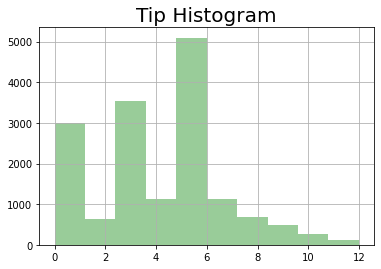

In [259]:
# Uji Normalitas Pay_amount
summary_table['pay_amount'].hist(color='green',alpha=0.4) #alpha=transparency color
plt.title('Tip Histogram', size=20)
plt.show()

Data pay_amount berdasarkan histrogram tidak berdistribusi normal

In [275]:
# Uji perbedaan pay_amount
# Ho : Rata-rata pay amount store 1 sama dengan store 2
# H1 : Rata-rata pay amount store 1 tidak sama dengan store 2

from scipy.stats import mannwhitneyu

result = list(mannwhitneyu(
summary_table[summary_table['staff_id']==1]['pay_amount'],
summary_table[summary_table['staff_id']==2]['pay_amount'],
alternative='greater'
))


print('Ho : Rata-rata pay amount store 1 sama dengan store 2')
print('H1 : Rata-rata pay amount store 1 tidak sama dengan store 2')
print ('P-Value',result[1])
if result[1]>0.05 :
    print('Ho tidak dapat ditolak karena P-Value >5%')
else :
    print('Ho ditolak karena P-Value <5%')

Ho : Rata-rata pay amount store 1 sama dengan store 2
H1 : Rata-rata pay amount store 1 tidak sama dengan store 2
P-Value 0.938660644283786
Ho tidak dapat ditolak karena P-Value >5%


Figure 1 : Performance Store 1 & 2 by Payment vs Rent Freq

In [186]:
%%html
<div class='tableauPlaceholder' id='viz1649043718938' style='position: relative'><noscript><a href='#'><img alt='Payment Vs Rent Freq Per Store All year ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;PaymentVsRentFreqPerStoreAllyear&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_Visualization&#47;PaymentVsRentFreqPerStoreAllyear' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;PaymentVsRentFreqPerStoreAllyear&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649043718938');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='80%';vizElement.style.height=(divElement.offsetWidth*0.50)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Figure 2 : Performance Store 1 & 2 by Payment per Month

In [185]:
%%html
<div class='tableauPlaceholder' id='viz1649044666130' style='position: relative'><noscript><a href='#'><img alt='Payment Per Store by Month ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;PaymentPerStorebyMonth&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_Visualization&#47;PaymentPerStorebyMonth' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;PaymentPerStorebyMonth&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649044666130');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='80%';vizElement.style.height=(divElement.offsetWidth*0.50)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Figure 3 : Performance Store 1 & 2 by Rental Freq. per Month

In [184]:
%%html
<div class='tableauPlaceholder' id='viz1649046480637' style='position: relative'><noscript><a href='#'><img alt='Rental Freq. Per Store by Month ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;RentalFreq_PerStorebyMonth&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_Visualization&#47;RentalFreq_PerStorebyMonth' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;RentalFreq_PerStorebyMonth&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649046480637');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='80%';vizElement.style.height=(divElement.offsetWidth*0.50)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

>Pertama-tama dilakukan uji hipotesis terkait ada tidaknya perbedaan pay_amount yang dimiliki store  1 & store 2. Uji hipotesis dilakukan menggunakan uji non parametrik Mann Whitney. Diduga terdapat perbedaan pay_amount antara keduanya. Hasil uji memberikan nilai P-Value sebesar 0.94 (> 5%), berdasarkan nilai P-Value ini dapat disimpulkan bahwa Ho tidak dapat ditolak. Dengan kata lain, tidak terlalu berbeda rata-rata pay_amount store 1 & store 2.

>Berdasarkan Fig.1 , dapat kita lihat performance dari store 1 dan 2 berdasarkan payment yang diterima dari customer dan jumlah rental dvd yang terjadi. Terlihat bahwa secara keseluruhan, store 2 memiliki jumlah payment yang lebih tinggi daripada store 1. Namun jika dilihat dari jumlah rental, store 1 lebih banyak dibandingkan dengan store 2. Walaupun demikian, kedua store memiliki range payment di 33K dan jumlah rental di range 8K. Keduanya dapat kita katakan memiliki performance yang cukup baik dan tidak jauh berbeda pada periode 2005-2006. Hal ini diperkuat dengan uji perbedaan yang dilakukan diawal yang menyatakan pay_amount keduanya tidak terlalu berbeda.

>Kita coba lihat lebih detail lagi, bagaimana performance dari kedua store per bulannya baik secara payment yang diterima dan jumlah rental yang terjadi (Fig.2 & Fig.3). Ternyata ketika dibreak lebih detail per month, dapat terlihat bahwa payment ataupun jumlah rental yang terjadi, baik store 1 ataupun store 2 mengalami kenaikan di bulan May-July 2005, namun mulai mengalami penurunan pada bulan Agustus 2005. Disini kita dapat katakan bahwa terdapat indikasi penurunan performance pada bulan kerja berikutnya . Trend penurunan ini tidak dapat diabaikan oleh pemilik jika tidak ingin trend bisnisnya mengalami penurunan di bulan-bulan berikutnya. Ada baiknya pemilik bisnis melakukan evaluasi terhadap kedua store, salah satunya dengan cara melakukan survey ke pelanggan terkait pelayanan kedua toko atau terkait harga rental yang ditawarkan, dll. Dengan begitu, dapat dilakukan improvement bisnis yang sesuai dengan customer focus.

#### **b. Rental Freq vs Payment by Rating Film of each Store**

1. Rating Film apa yang paling banyak diminati oleh customer di masing2 store ? Apakah kedua toko sama ?
2. Apakah Rating Film tertinggi memberikan payment tertinggi pada masing2 toko ?

Figure 4 : Jumlah Rental vs Payment by Rating Film & Store

In [193]:
%%html
<div class='tableauPlaceholder' id='viz1649053821611' style='position: relative'><noscript><a href='#'><img alt='Jml Rental vs Payment By Rating Film &amp; Store ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;JmlRentalvsPaymentByRatingFilmStore&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_Visualization&#47;JmlRentalvsPaymentByRatingFilmStore' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;JmlRentalvsPaymentByRatingFilmStore&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649053821611');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.50)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

>Berdasarkan Fig.4, dapat dilihat bahwa customer pada masing-masing store memiliki peminatan rating yang berbeda. Pada store 1, top 3 rating film yang banyak dirental customer adalah PG-13, NC-17 & R . Sedangkan pada store 2 : PG-13, PG & R. Berdasarkan Fig.4 juga, dapat kita simpulkan bahwa rating film yang paling banyak dirental oleh customer belum tentu memberikan kontribusi payment terbesar pada store. Kita lihat pada store 2, walaupun rating film R termasuk kedalam top 3, secara payment nilainya lebih besar dari film dengan rating NC-17.
>
>Informasi ini dapat dijadikan salah satu strategi bagi pemilik bisnis untuk meningkatkan performance store. Film-film yang ada pada setiap store disesuaikan dengan peminatan yang paling banyak. Pemilik bisnis bisa memfokuskan store 1 untuk memperbanyak film-film dengan rating PG-13, NC-17 & R, begitupun dengan store 2. Dengan begitu, diharapkan jumlah rental dapat mengalami kenaikan yang signifikan pada masing-masing store. Bisa juga dilakukan peningkatan performance dari sisi payment yang diterima, dimana masing-masing store dapat difokuskan pada rating-rating film dengan payment tertinggi. Dalam hal ini store 2 dapat fokus memperbanyak inventory pada film PG-13, PG & NC-17

#### **c. Rental Freq vs Payment by Category Film of each Store**

1. Category Film apa yang paling banyak diminati oleh customer di masing2 store ? Apakah kedua store sama ?
2. Apakah Category Film tertinggi memberikan payment tertinggi pada masing2 toko ?

Figure 5 : Jumlah Rental vs Payment by Category Film & Store

In [192]:
%%html
<div class='tableauPlaceholder' id='viz1649054070406' style='position: relative'><noscript><a href='#'><img alt='Jml Rental vs Payment By Category Film &amp; Store ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;JmlRentalvsPaymentByCategoryFilmStore&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_Visualization&#47;JmlRentalvsPaymentByCategoryFilmStore' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_Visualization&#47;JmlRentalvsPaymentByCategoryFilmStore&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649054070406');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

>Berdasarkan Fig.5, customer pada store 1 lebih banyak melakukan rental pada film dengan category : Animation, Sports, Family, Action, Sci-Fi. Sedangkan pada store 2 lebih banyak pada film dengan category : Sports, Animation, Action, Sci-Fi dan Foreign. Namun, jika dilihat berdasarkan payment, category tertinggi di store 2 adalah Sport, Animation, Sci-Fi, Drama, Comedy. Untuk store 1 adalah Sports, Sci-Fi, Drama, Animation, Action. Dapat dikatakan bahwa film category dengan frequency rental yang tinggi belum tentu memiliki payment yang tinggi juga.
>
>Informasi ini dapat digunakan oleh pemilik bisnis sebagai salah satu strategi peningkatan performance masing-masing store. Store 1 & 2 dapat difokuskan pada film-film dengan kategori yang payment tertinggi sekaligus jumlah rent tertinggi, berdasarkan informasi diatas adalah : Sports, Animation, Action, Sci-Fi.

#### **c. Korelasi antar variabel**

>1. Apakah terdapat hubungan antara staff_id(store) dengan rent_rate ? Bagaimanakah hubungan keduanya ?

>Sebelum melakukan uji korelasi, terlebih dahulu dilakukan pemetaan menggunakan scatter plot untuk melihat sebaran data. Nantinya , sebaran data ini akan dijadikan sebagai acuan dalam memilih metode uji korelasi.

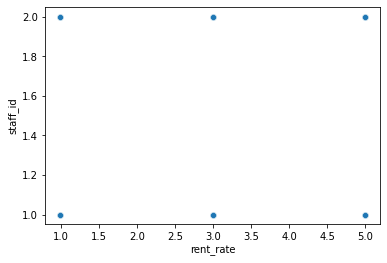

In [276]:
# Scatterplot pay_amount & rent_rate
sns.scatterplot(x = summary_table['rent_rate'], y= summary_table['staff_id'])
plt.show()

Scatterplot menunjukkan bahwa variabel rent_rate & summary_table tidak membentuk garis linear, maka uji korelasi yang digunakan adalah korelasi spearman

In [277]:
# Korelasi antara pay_amount & rent_rate
summary_table[['rent_rate','staff_id']].corr(method = 'spearman')

,rent_rate,staff_id
rent_rate,1.000000,0.001435
staff_id,0.001435,1.000000


>Berdasarkan uji korelasi , terlihat bahwa variable rent_rate memiliki hubungan dengan staff_id/store, nilai korelasi sebesar 0.0014. Namun hubungan keduanya tidak terlalu kuat.